# Fake news detection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Read datasets

In [6]:
fake = pd.read_csv(r'C:\Users\admin\Downloads\Fake.csv\Fake.csv')
true = pd.read_csv(r'C:\Users\admin\Downloads\True.csv\True.csv')

In [7]:
fake.shape

(23481, 4)

In [8]:
true.shape

(21417, 4)

# Data cleaning and preparation

In [9]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [10]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [11]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
# Check the data
data.head()

,title,text,subject,date,target
0,Trump's nominee for Fed says banking rules nee...,WASHINGTON (Reuters) - U.S. banking rules must...,politicsNews,"July 26, 2017",true
1,EPIC RESPONSE AFTER THE BOSTON GLOBE Runs Fake...,THE BOSTON GLOBE ran a Sunday edition with a f...,politics,"Apr 11, 2016",fake
2,White House: Castro's death will not likely sl...,WASHINGTON (Reuters) - The death of Cuba’s Fid...,politicsNews,"November 28, 2016",true
3,Did Hillary Clinton REALLY Break Her Toe? [VIDEO],"On Friday, freelance reporter and political co...",politics,"Oct 23, 2017",fake
4,WOW! HUNGARIAN PRIME MINISTER Cracks Down On R...,Hungary s populist prime minister on Friday la...,Government News,"Feb 14, 2017",fake


In [13]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Trump's nominee for Fed says banking rules nee...,WASHINGTON (Reuters) - U.S. banking rules must...,politicsNews,true
1,EPIC RESPONSE AFTER THE BOSTON GLOBE Runs Fake...,THE BOSTON GLOBE ran a Sunday edition with a f...,politics,fake
2,White House: Castro's death will not likely sl...,WASHINGTON (Reuters) - The death of Cuba’s Fid...,politicsNews,true
3,Did Hillary Clinton REALLY Break Her Toe? [VIDEO],"On Friday, freelance reporter and political co...",politics,fake
4,WOW! HUNGARIAN PRIME MINISTER Cracks Down On R...,Hungary s populist prime minister on Friday la...,Government News,fake


In [14]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - U.S. banking rules must...,politicsNews,true
1,THE BOSTON GLOBE ran a Sunday edition with a f...,politics,fake
2,WASHINGTON (Reuters) - The death of Cuba’s Fid...,politicsNews,true
3,"On Friday, freelance reporter and political co...",politics,fake
4,Hungary s populist prime minister on Friday la...,Government News,fake


In [15]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - u.s. banking rules must...,politicsNews,true
1,the boston globe ran a sunday edition with a f...,politics,fake
2,washington (reuters) - the death of cuba’s fid...,politicsNews,true
3,"on friday, freelance reporter and political co...",politics,fake
4,hungary s populist prime minister on friday la...,Government News,fake


In [18]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [19]:
# Check
data.head()

,text,subject,target
0,washington reuters us banking rules must prot...,politicsNews,true
1,the boston globe ran a sunday edition with a f...,politics,fake
2,washington reuters the death of cuba’s fidel ...,politicsNews,true
3,on friday freelance reporter and political con...,politics,fake
4,hungary s populist prime minister on friday la...,Government News,fake


In [20]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
data.head()

,text,subject,target
0,washington reuters us banking rules must prote...,politicsNews,true
1,boston globe ran sunday edition fake cover sla...,politics,fake
2,washington reuters death cuba’s fidel castro u...,politicsNews,true
3,friday freelance reporter political consultant...,politics,fake
4,hungary populist prime minister friday lashed ...,Government News,fake


# Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


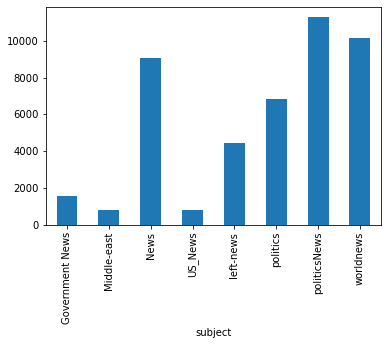

In [22]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


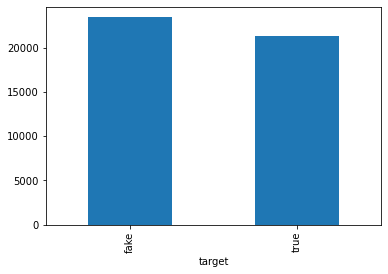

In [25]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [27]:
pip install WordCloud

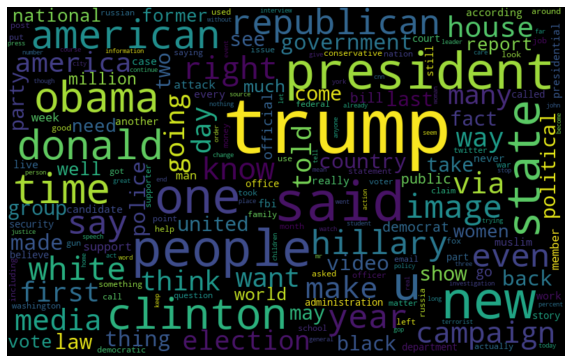

In [28]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

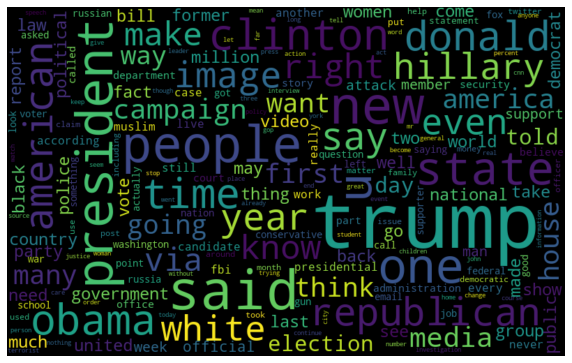

In [29]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

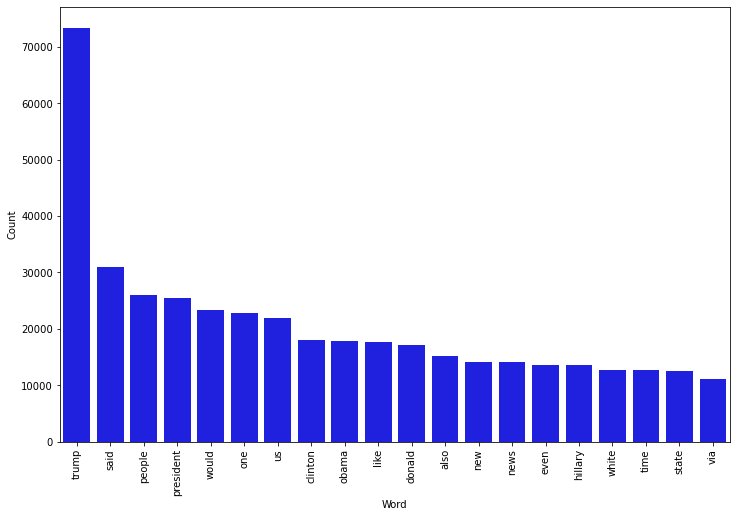

In [31]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

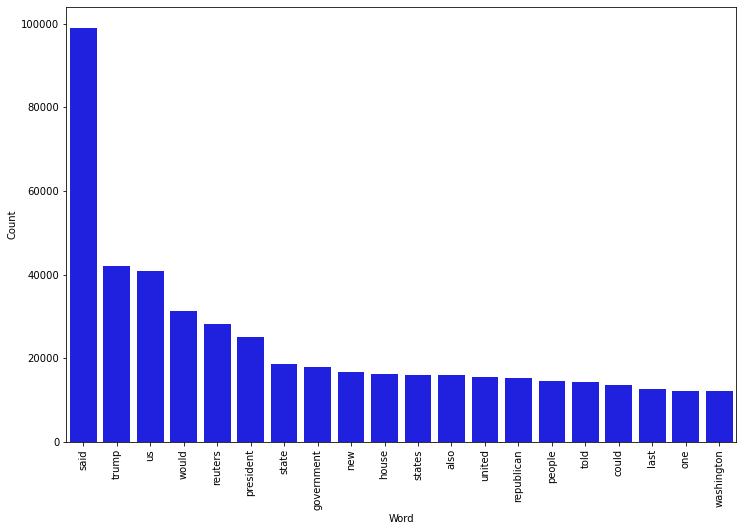

In [32]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [33]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Preparing the data

In [36]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Logistic regression

In [37]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.05%


Confusion matrix, without normalization


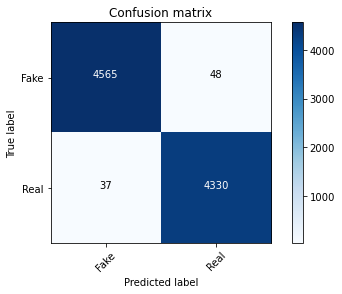

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.54%


Confusion matrix, without normalization


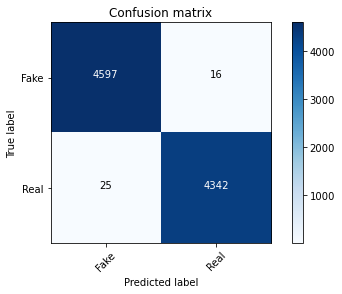

In [40]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.98%


Confusion matrix, without normalization


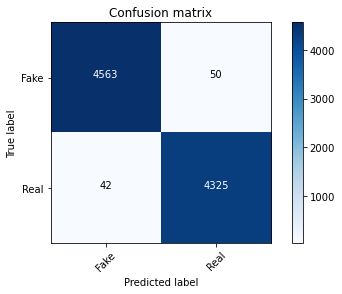

In [42]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])